In [1]:
from pathlib import Path
from eelbrain import *
from matplotlib import pyplot
import mne
import numpy
import re


%run experiment.py           #e is the experiment object

INFO    :  *** Experiment initialized with root /Users/maryamvalian/Data/Aphasia on 2025-05-20 16:28:51 ***
INFO    :  Using eelbrain 0.40.4, mne 1.9.0.
DEBUG   :  Outdated cache files:
DEBUG   :  No existing cache files affected.


In [2]:
epochs=e.load_epochs(epoch='word-real') #for one subject by default
#epochs
tstart=0.1
tstop=0.6

DEBUG   :  Raw n-ica: applying ICA for R0240/words...


In [3]:
#word_young = e.load_evoked_stc('young', epoch='word', model='word % inflected'
#       , src='vol-5', inv='vec-3-MNE-0', parc='aparc+aseg')
#word_aphasia = e.load_evoked_stc('aphasia', epoch='word', model='word % inflected'
#       , src='vol-5', inv='vec-3-MNE-0', parc='aparc+aseg')
#word_old = e.load_evoked_stc('old', epoch='word', model='word % inflected'
#       , src='vol-5', inv='vec-3-MNE-0', parc='aparc+aseg')
#plot.GlassBrain.butterfly(word_young['srcm'].mean('case'), cmap='Reds')

## Mask define

In [4]:
wholebrain_cortical_subcortical_mask = [
 'Left-Cerebral-White-Matter',
 'Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Putamen',
 'Left-Hippocampus',
 'Left-Amygdala',
 'Left-Accumbens-area',
 'Left-vessel',
 'Right-Cerebral-White-Matter',
 'Right-Inf-Lat-Vent',
 'Right-Putamen',
 'Right-Hippocampus',
 'Right-Amygdala',
 'ctx-lh-bankssts',
 'ctx-lh-caudalanteriorcingulate',
 'ctx-lh-caudalmiddlefrontal',
 'ctx-lh-cuneus',
 'ctx-lh-entorhinal',
 'ctx-lh-fusiform',
 'ctx-lh-inferiorparietal',
 'ctx-lh-inferiortemporal',
 'ctx-lh-isthmuscingulate',
 'ctx-lh-lateraloccipital',
 'ctx-lh-lateralorbitofrontal',
 'ctx-lh-lingual',
 'ctx-lh-medialorbitofrontal',
 'ctx-lh-middletemporal',
 'ctx-lh-parahippocampal',
 'ctx-lh-paracentral',
 'ctx-lh-parsopercularis',
 'ctx-lh-parsorbitalis',
 'ctx-lh-parstriangularis',
 'ctx-lh-pericalcarine',
 'ctx-lh-postcentral',
 'ctx-lh-posteriorcingulate',
 'ctx-lh-precentral',
 'ctx-lh-precuneus',
 'ctx-lh-rostralanteriorcingulate',
 'ctx-lh-rostralmiddlefrontal',
 'ctx-lh-superiorfrontal',
 'ctx-lh-superiorparietal',
 'ctx-lh-superiortemporal',
 'ctx-lh-supramarginal',
 'ctx-lh-frontalpole',
 'ctx-lh-temporalpole',
 'ctx-lh-transversetemporal',
 'ctx-lh-insula',
 'ctx-rh-bankssts',
 'ctx-rh-caudalanteriorcingulate',
 'ctx-rh-caudalmiddlefrontal',
 'ctx-rh-cuneus',
 'ctx-rh-entorhinal',
 'ctx-rh-fusiform',
 'ctx-rh-inferiorparietal',
 'ctx-rh-inferiortemporal',
 'ctx-rh-isthmuscingulate',
 'ctx-rh-lateraloccipital',
 'ctx-rh-lateralorbitofrontal',
 'ctx-rh-lingual',
 'ctx-rh-medialorbitofrontal',
 'ctx-rh-middletemporal',
 'ctx-rh-parahippocampal',
 'ctx-rh-paracentral',
 'ctx-rh-parsopercularis',
 'ctx-rh-parsorbitalis',
 'ctx-rh-parstriangularis',
 'ctx-rh-pericalcarine',
 'ctx-rh-postcentral',
 'ctx-rh-posteriorcingulate',
 'ctx-rh-precentral',
 'ctx-rh-precuneus',
 'ctx-rh-rostralanteriorcingulate',
 'ctx-rh-rostralmiddlefrontal',
 'ctx-rh-superiorfrontal',
 'ctx-rh-superiorparietal',
 'ctx-rh-superiortemporal',
 'ctx-rh-supramarginal',
 'ctx-rh-frontalpole',
 'ctx-rh-temporalpole',
 'ctx-rh-transversetemporal',
 'ctx-rh-insula']

lh_cortical_subcortical_mask = [
 'Left-Cerebral-White-Matter',
 'Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Putamen',
 'Left-Hippocampus',
 'Left-Amygdala',
 'Left-Accumbens-area',
 'Left-vessel',
 'ctx-lh-bankssts',
 'ctx-lh-caudalanteriorcingulate',
 'ctx-lh-caudalmiddlefrontal',
 'ctx-lh-cuneus',
 'ctx-lh-entorhinal',
 'ctx-lh-fusiform',
 'ctx-lh-inferiorparietal',
 'ctx-lh-inferiortemporal',
 'ctx-lh-isthmuscingulate',
 'ctx-lh-lateraloccipital',
 'ctx-lh-lateralorbitofrontal',
 'ctx-lh-lingual',
 'ctx-lh-medialorbitofrontal',
 'ctx-lh-middletemporal',
 'ctx-lh-parahippocampal',
 'ctx-lh-paracentral',
 'ctx-lh-parsopercularis',
 'ctx-lh-parsorbitalis',
 'ctx-lh-parstriangularis',
 'ctx-lh-pericalcarine',
 'ctx-lh-postcentral',
 'ctx-lh-posteriorcingulate',
 'ctx-lh-precentral',
 'ctx-lh-precuneus',
 'ctx-lh-rostralanteriorcingulate',
 'ctx-lh-rostralmiddlefrontal',
 'ctx-lh-superiorfrontal',
 'ctx-lh-superiorparietal',
 'ctx-lh-superiortemporal',
 'ctx-lh-supramarginal',
 'ctx-lh-frontalpole',
 'ctx-lh-temporalpole',
 'ctx-lh-transversetemporal',
 'ctx-lh-insula',
]


mask = wholebrain_cortical_subcortical_mask
mask_name = [name for name in globals() if globals()[name] is mask][0]

# One sample t-tests
## Inside Young Group

In [5]:
res_cache_file = f'  tfce young'
res_cache_dir ="~/Code/MEGAN/Tests/oneSample"

session='words'
group='young'
epochs= ['word-real','word-stem','word-inflected']
#epoch word-real contains both realinflected and realuninflected

conditions=['pseudouninflected', 'realuninflected', 'pseudoinflected', 'realinflected']

# From Lexical column 
# resolution 5 does not generate mask error	(low resolution like vol-10 generates error for mask detection										
e.set(epoch='word')
stc_all = e.load_evoked_stc(
    subjects=group, 
    baseline=False, 
    cov='emptyroom', 
    model='word % inflected',
    src='vol-10',
    inv='vec-3-MNE-0',
    parc='aparc+aseg',

)
#data['srcm']
#plot.Butterfly(data['srcm'].norm('space'))

for cond in conditions:
    
   
    data = stc_all.sub(f"(lexical == '{cond}')")
    res = testnd.Vector('srcm', match='subject', data=data, tfce=True, tstart=tstart, tstop=tstop)
    
    
    
    save.pickle(res, res_cache_dir + cond + res_cache_file)
    print(session + ': ' + cond + '\n' + str(res.find_clusters()))
    
       

Localize:   0%|          | 0/56 [00:00<?, ?it/s]

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

words: pseudouninflected
#   id     n_sources   location                      tstart   tstop   duration   p        sig
---------------------------------------------------------------------------------------------
0   1      532         ctx-lh-inferiortemporal       0.1      0.6     0.5        0.0001   ***
1   11     515         Unknown                       0.1      0.38    0.28       0        ***
2   13     340         Unknown                       0.384    0.6     0.216      0.0002   ***
3   3024   1           Right-Cerebral-White-Matter   0.584    0.588   0.004      0.0499   *  
4   3241   2           Unknown                       0.272    0.284   0.012      0.0459   *  
5   3266   5           Right-Cerebral-White-Matter   0.512    0.556   0.044      0.0431   *  
6   3541   1           ctx-rh-precentral             0.572    0.584   0.012      0.0472   *  
7   3552   2           Unknown                       0.568    0.58    0.012      0.0433   *  


Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

words: realuninflected
#    id     n_sources   location                      tstart   tstop   duration   p        sig
----------------------------------------------------------------------------------------------
0    1      517         ctx-lh-inferiortemporal       0.1      0.6     0.5        0.0001   ***
1    16     513         Unknown                       0.1      0.6     0.5        0        ***
2    1020   8           Right-Cerebral-White-Matter   0.56     0.588   0.028      0.0425   *  
3    1489   3           ctx-lh-rostralmiddlefrontal   0.368    0.38    0.012      0.0468   *  
4    1494   1           Left-Cerebral-White-Matter    0.368    0.376   0.008      0.0495   *  
5    2067   2           Right-Cerebral-White-Matter   0.392    0.408   0.016      0.0482   *  
6    2318   1           Left-Cerebral-White-Matter    0.432    0.444   0.012      0.0491   *  
7    2910   6           Right-Cerebral-White-Matter   0.464    0.492   0.028      0.0481   *  
8    2913   1           Rig

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

words: pseudoinflected
#   id     n_sources   location                      tstart   tstop   duration   p        sig
---------------------------------------------------------------------------------------------
0   1      517         ctx-lh-inferiortemporal       0.1      0.6     0.5        0        ***
1   16     492         Unknown                       0.1      0.344   0.244      0        ***
2   17     235         Unknown                       0.36     0.6     0.24       0.0002   ***
3   536    3           Unknown                       0.224    0.284   0.06       0.0392   *  
4   3078   1           Right-Cerebral-White-Matter   0.48     0.488   0.008      0.0469   *  


Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

words: realinflected
#    id     n_sources   location                      tstart   tstop   duration   p        sig
----------------------------------------------------------------------------------------------
0    1      524         ctx-lh-inferiortemporal       0.1      0.588   0.488      0        ***
1    15     516         Unknown                       0.1      0.344   0.244      0        ***
2    17     326         Unknown                       0.34     0.6     0.26       0.0002   ***
3    281    1           ctx-rh-parahippocampal        0.392    0.404   0.012      0.045    *  
4    845    1           Right-Cerebral-White-Matter   0.488    0.5     0.012      0.0458   *  
5    1009   2           Right-Cerebral-White-Matter   0.336    0.34    0.004      0.0495   *  
6    1109   3           Unknown                       0.596    0.6     0.004      0.0483   *  
7    1213   2           Unknown                       0.588    0.596   0.008      0.0469   *  
8    1268   2           ctx-r

# Plot Signigficant Clusters

In [6]:
#real-inf
clus=res.find_clusters(0.05, maps=True)
clus

#,id,n_sources,location,tstart,tstop,duration,p,sig
0,1,524,ctx-lh-inferiortemporal,0.1,0.588,0.488,0,***
1,15,516,Unknown,0.1,0.344,0.244,0,***
2,17,326,Unknown,0.34,0.6,0.26,0.0002,***
3,281,1,ctx-rh-parahippocampal,0.392,0.404,0.012,0.045,*
4,845,1,Right-Cerebral-White-Matter,0.488,0.5,0.012,0.0458,*
5,1009,2,Right-Cerebral-White-Matter,0.336,0.34,0.004,0.0495,*
6,1109,3,Unknown,0.596,0.6,0.004,0.0483,*
7,1213,2,Unknown,0.588,0.596,0.008,0.0469,*
8,1268,2,ctx-rh-rostralmiddlefrontal,0.5,0.512,0.012,0.046,*
9,1310,1,Unknown,0.548,0.568,0.02,0.0458,*


In [7]:
#Plot first cluster of pseudo-inflected
#0	1	532	ctx-lh-inferiortemporal	0.1	0.6	0.5	0.0001	***
#plot.GlassBrain.butterfly(clus[0,'cluster'])

In [8]:
#plot.GlassBrain.butterfly(res)
#interactive (run from terminal)

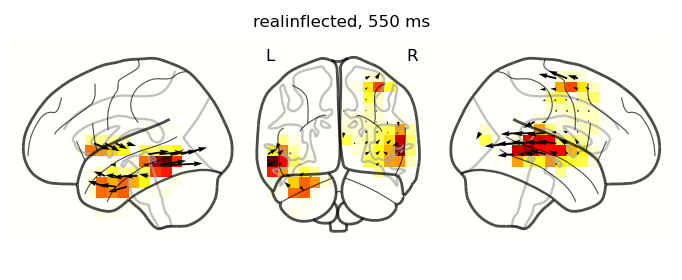

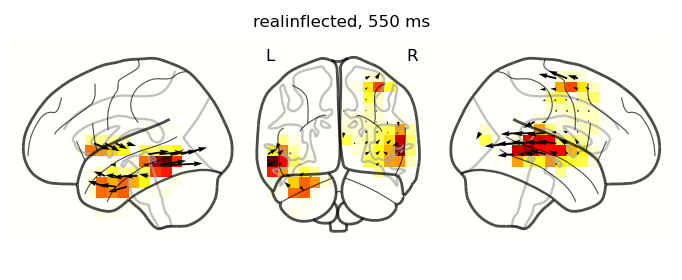

In [9]:
#Diff real-inflected
plot.GlassBrain(res.masked_difference().sub(time=0.55),title=f"{cond}, 550 ms")

# Paired Tests
## Inside Young Group

In [10]:
#e.load_events()
#stc_all.head()

### real Vs. pseudo



In [11]:
contrast = ['real-pseudo']
cond1, cond2 = contrast[0].split('-')

#for table.difference we can't do it inline with testnd

res = testnd.VectorDifferenceRelated('srcm', 'word', cond1, cond2, match='subject', data=stc_all, tfce=True, tstart=tstart, tstop=tstop)

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

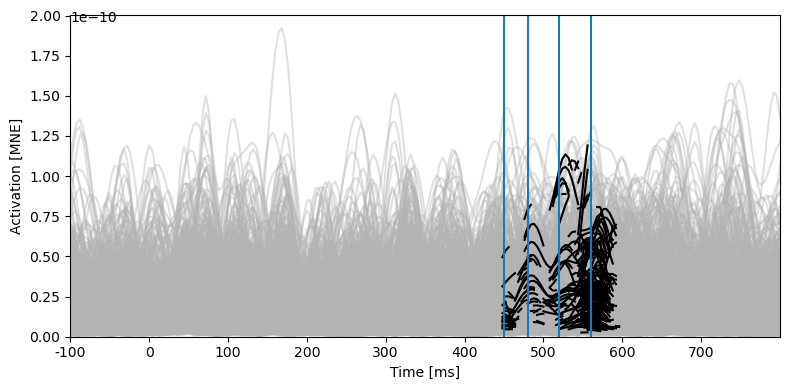

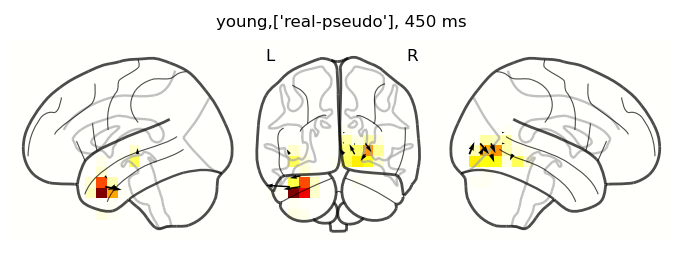

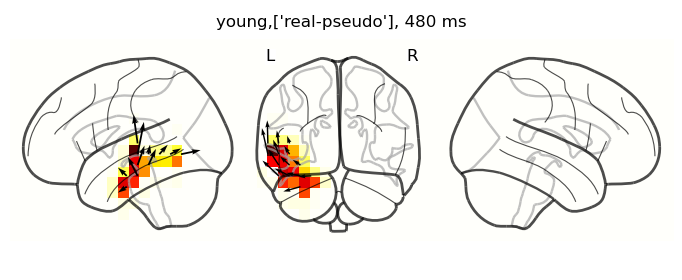

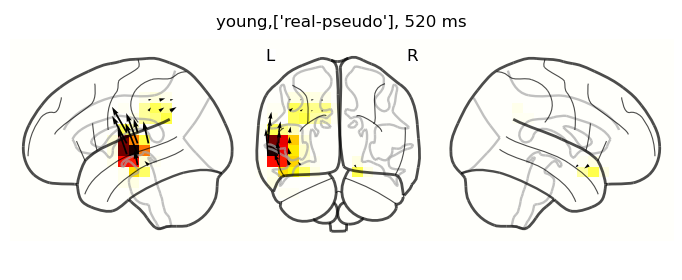

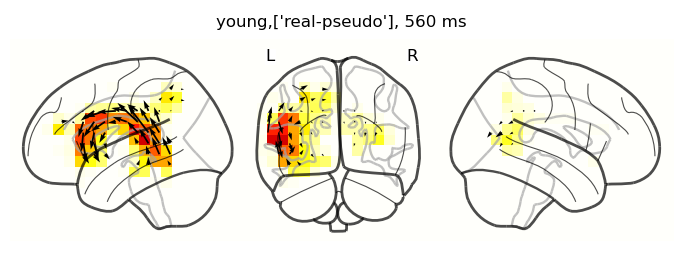

In [12]:
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k')
times = [0.45, 0.48, 0.52, 0.56]
for t in times:
    p.add_vline(t)
for t in times:
    f = plot.GlassBrain(diff.sub(time=t), title=f"{group},{contrast}, {t*1000:.0f} ms")    

### real-inf Vs. real-uninf


In [13]:
contrast = ['realinflected-realuninflected']
cond1, cond2 = contrast[0].split('-')

#for table.difference we can't do it inline with testnd

res = testnd.VectorDifferenceRelated('srcm', 'lexical', cond1, cond2, match='subject', data=stc_all, tfce=True)

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

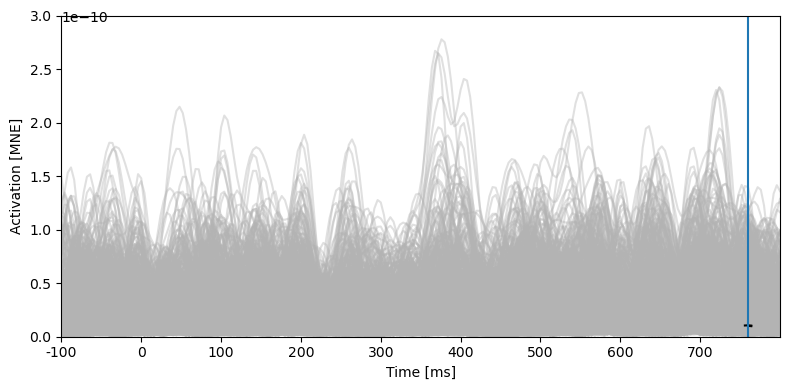

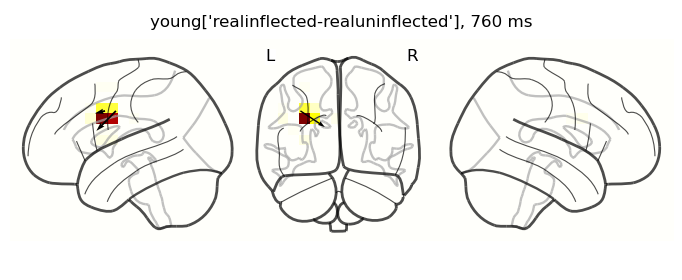

In [14]:
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k')
times = [0.76]
for t in times:
    p.add_vline(t)
    f = plot.GlassBrain(diff.sub(time=t), title=f"{group}{contrast}, {t*1000:.0f} ms")  

### psuedo-inf Vs. pseudo-uninf

In [15]:
contrast = ['pseudoinflected-pseudouninflected']
cond1, cond2 = contrast[0].split('-')

#for table.difference we can't do it inline with testnd

res = testnd.VectorDifferenceRelated('srcm', 'lexical', cond1, cond2, match='subject', data=stc_all, tfce=True, tstart=tstart, tstop=tstop)

Permutation test:   0%|          | 0/10000 [00:00<?, ? permutations/s]

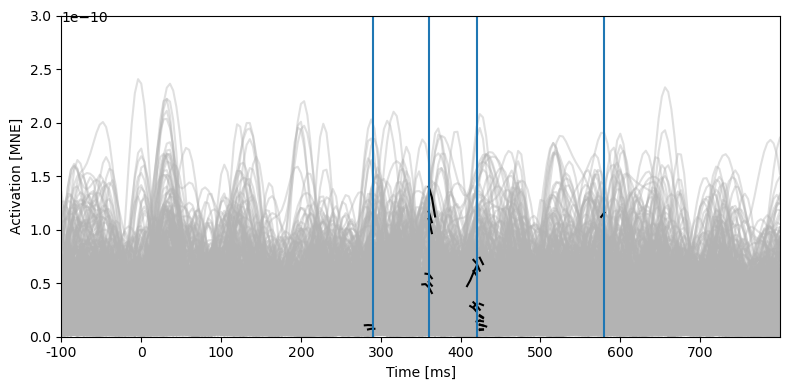

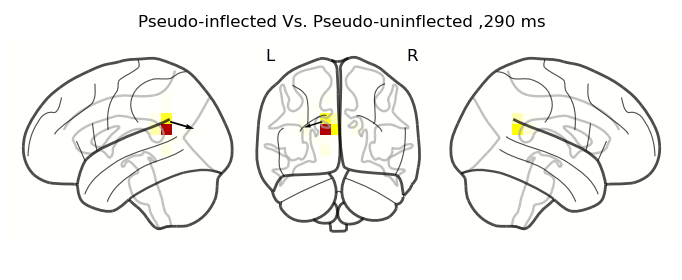

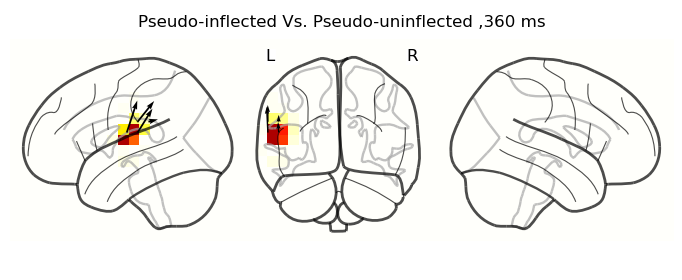

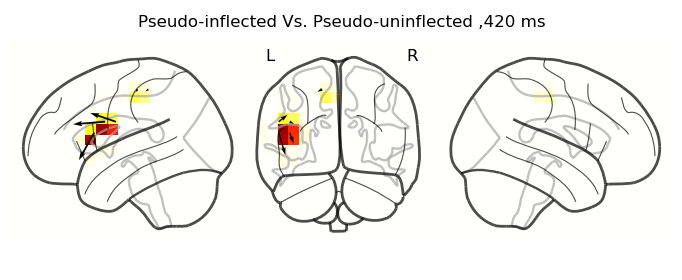

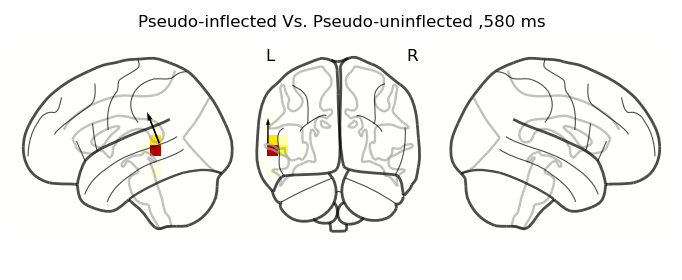

In [16]:
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k')
times = [ 0.29,0.36, 0.42,0.58]
for t in times:
    p.add_vline(t)
    f = plot.GlassBrain(diff.sub(time=t), title=f"Pseudo-inflected Vs. Pseudo-uninflected ,{t*1000:.0f} ms")

In [17]:
#res = testnd.VectorDifferenceRelated('srcm', 'word % inflected', ('real', 'inflected'), ('pseudo', 'uninflected'), match='subject', data=stc_all, tfce=True, tstart=tstart, tstop=tstop)
#res = testnd.VectorDifferenceRelated('srcm', 'word', 'real', 'pseudo', sub="inflected == 'uninflected'", match='subject', data=stc_all, tfce=True, tstart=tstart, tstop=tstop)

## Inside Aphasia Group

In [18]:
group='aphasia'

e.set(epoch='word')
aph_stc_all = e.load_evoked_stc(
    subjects=group, 
    baseline=False, 
    cov='emptyroom', 
    model='word % inflected',
    src='vol-10',
    inv='vec-3-MNE-0',
    parc='aparc+aseg',

)

Localize:   0%|          | 0/24 [00:00<?, ?it/s]

### Real Vs. Pseudo

In [19]:
contrast = ['real-pseudo']
cond1, cond2 = contrast[0].split('-')

res = testnd.VectorDifferenceRelated('srcm', 'word', cond1, cond2, match='subject', data=aph_stc_all, tfce=True,tstart=tstart, tstop=tstop)



Permutation test:   0%|          | 0/63 [00:00<?, ? permutations/s]

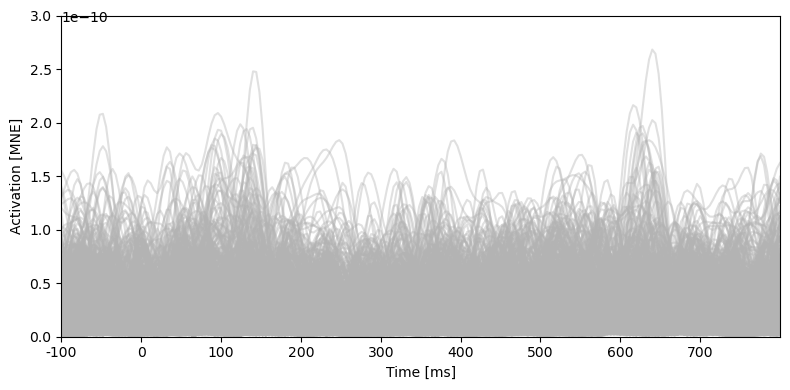

In [20]:
diff= res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k')
#times = [0.29, 0.36, 0.42, 0.58]
#for t in times:
#    p.add_vline(t)
#for t in times:
#    f = plot.GlassBrain(diff.sub(time=t), title=f"Aphasia group, {contrast}, {t*1000:.0f} ms")

### pseudo-inf VS pseudo-uninf

In [21]:
contrast = ['pseudoinflected-pseudouninflected']
cond1, cond2 = contrast[0].split('-')

res = testnd.VectorDifferenceRelated('srcm', 'lexical', cond1, cond2, match='subject', data=aph_stc_all, tfce=True)

#tstart=tstart, tstop=tstop

Permutation test:   0%|          | 0/63 [00:00<?, ? permutations/s]

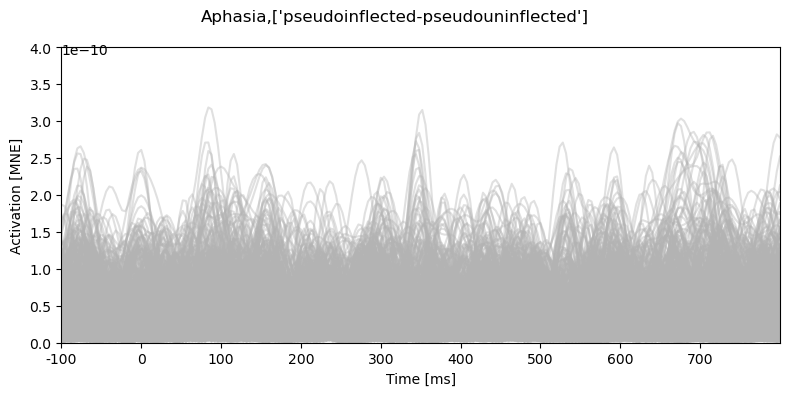

In [22]:
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k', title=f"Aphasia,{contrast}")
#times = [ 0.29,0.36, 0.42,0.58]
#for t in times:
#    p.add_vline(t)
#    f = plot.GlassBrain(diff.sub(time=t), title=f"Aphasia,{contrast} ,{t*1000:.0f} ms")

### real-inf Vs. Real-uninf

In [23]:
contrast = ['realinflected-realuninflected']
cond1, cond2 = contrast[0].split('-')

#for table.difference we can't do it inline with testnd

res = testnd.VectorDifferenceRelated('srcm', 'lexical', cond1, cond2, match='subject', data=aph_stc_all, tfce=True)

Permutation test:   0%|          | 0/63 [00:00<?, ? permutations/s]

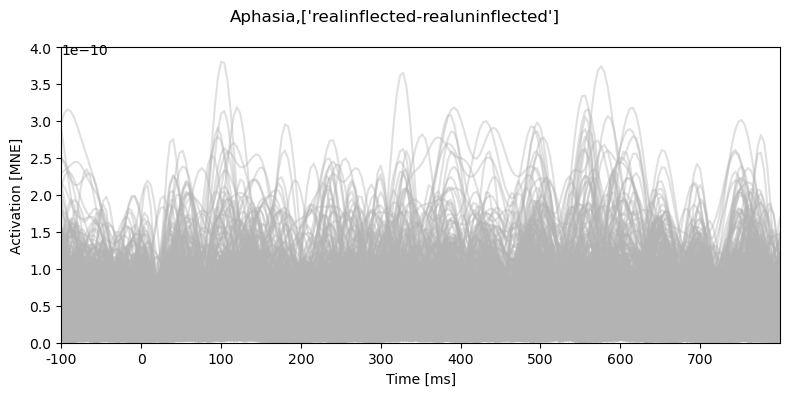

In [24]:
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k', title=f"Aphasia,{contrast}")
#times = [ 0.29,0.36, 0.42,0.58]

## Inside Old Group

In [25]:
group='old'

e.set(epoch='word')
old_stc_all = e.load_evoked_stc(
    subjects=group, 
    baseline=False, 
    cov='emptyroom', 
    model='word % inflected',
    src='vol-10',
    inv='vec-3-MNE-0',
    parc='aparc+aseg',

)

Localize:   0%|          | 0/36 [00:00<?, ?it/s]

In [26]:
#plot.GlassBrain.butterfly(old_stc_all['srcm'].mean('case'))

### Real Vs. Pseudo

In [27]:
#Paired test
contrast = ['real-pseudo']
cond1, cond2 = contrast[0].split('-')

res = testnd.VectorDifferenceRelated('srcm', 'word', cond1, cond2, match='subject', data=old_stc_all, tfce=True, tstart=tstart, tstop=tstop)



Permutation test:   0%|          | 0/511 [00:00<?, ? permutations/s]

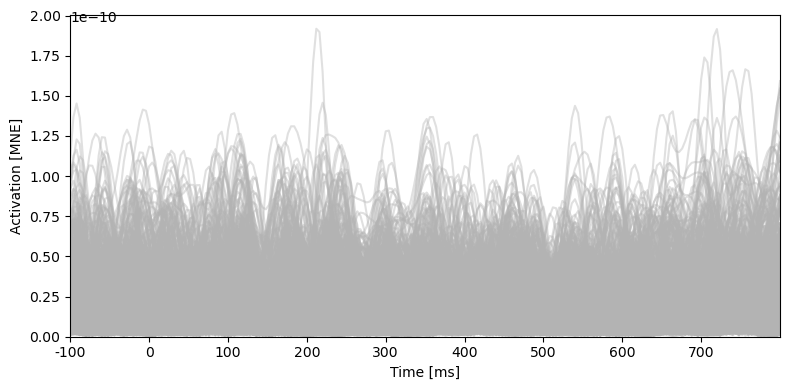

In [28]:
#plot diff
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k')
#times = [0.29, 0.36, 0.42, 0.58]
#for t in times:
#    p.add_vline(t)
#for t in times:
#    f = plot.GlassBrain(diff.sub(time=t), title=f"{group} group, {contrast}, {t*1000:.0f} ms")

### Pseudo : inf Vs Uninf

In [29]:
contrast = ['pseudoinflected-pseudouninflected']
cond1, cond2 = contrast[0].split('-')

res = testnd.VectorDifferenceRelated('srcm', 'lexical', cond1, cond2, match='subject', data=old_stc_all, tfce=True)

#tstart=tstart, tstop=tstop

Permutation test:   0%|          | 0/511 [00:00<?, ? permutations/s]

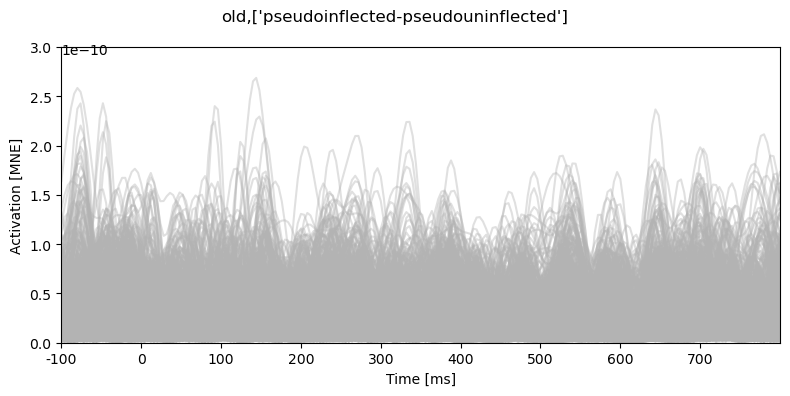

In [30]:
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k', title=f"{group},{contrast}")
#times = [ 0.29,0.36, 0.42,0.58]
#for t in times:
#    p.add_vline(t)
#    f = plot.GlassBrain(diff.sub(time=t), title=f{group},{contrast} ,{t*1000:.0f} ms")

### Real: inf Vs Uninf

In [31]:
#test
contrast = ['realinflected-realuninflected']
cond1, cond2 = contrast[0].split('-')

#for table.difference we can't do it inline with testnd

res = testnd.VectorDifferenceRelated('srcm', 'lexical', cond1, cond2, match='subject', data=old_stc_all, tfce=True)

Permutation test:   0%|          | 0/511 [00:00<?, ? permutations/s]

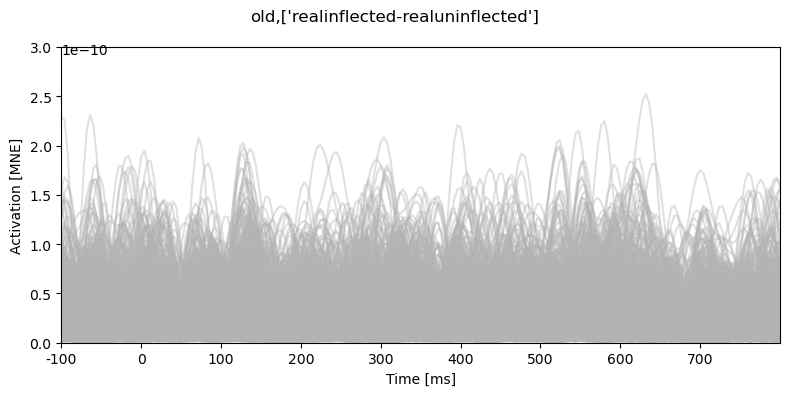

In [32]:
#plot diff
diff = res.masked_difference()
p = plot.Butterfly(diff.norm('space'), color='k',title=f"{group},{contrast}")
times = [0.29, 0.36, 0.42, 0.58]
#for t in times:
#    p.add_vline(t)
#for t in times:
#    f = plot.GlassBrain(diff.sub(time=t), title=f"{group} group, {contrast}, {t*1000:.0f} ms")

In [33]:
#TODO

#Analysis for Control Group: Old+Younge
#Find significant ROI then compare between groups 